# Batch Normalization in Deep Networks
---
[Original url](https://www.learnopencv.com/batch-normalization-in-deep-networks/)

Code from [Keras-team](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py)


In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import os
import pickle
import matplotlib.pyplot as plt
from numpy.random import seed
seed(7)

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20

save_dir = os.path.join(os.getcwd(), './Example_Batch_Normalization/with_batch_normalization/saved_models_Bn_100')
model_name = 'keras_cifar10_trained_model_with_bh.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
def plot_history(history, mode):
    # Plot the accuracy and loss curves
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy '+str(mode))
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss ' + str(mode))
    plt.legend()

    plt.show()

In [4]:
def model_without_batch_normalization():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [5]:
def model_with_batch_normalization():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    return model

In [6]:
model = model_with_batch_normalization()

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
                                 featurewise_center=False,  # set input mean to 0 over the dataset
                                 samplewise_center=False,  # set each sample mean to 0
                                 featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                 samplewise_std_normalization=False,  # divide each input by its std
                                 zca_whitening=False,  # apply ZCA whitening
                                 zca_epsilon=1e-06,  # epsilon for ZCA whitening
                                 rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
                                 width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                 height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                 shear_range=0.,  # set range for random shear
                                 zoom_range=0.,  # set range for random zoom
                                 channel_shift_range=0.,  # set range for random channel shifts
                                 fill_mode='nearest',  # set mode for filling points outside the input boundaries
                                 cval=0.,  # value used for fill_mode = "constant"
                                 horizontal_flip=True,  # randomly flip images
                                 vertical_flip=False,  # randomly flip images
                                 rescale=None,  # set rescaling factor (applied before any other transformation)
                                 preprocessing_function=None,  # set function that will be applied on each input
                                 data_format=None,  # image data format, either "channels_first" or "channels_last"
                                 validation_split=0.0)  # fraction of images reserved for validation (strictly between 0 and 1)
        
    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)
            
    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs,steps_per_epoch=50, validation_data=(x_test, y_test), workers=4)

Using real-time data augmentation.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
50/50 [==============================] - 7s 132ms/step - loss: 1.7273 - acc: 0.3931 - val_loss: 1.8193 - val_acc: 0.3702
Epoch 2/100
50/50 [==============================] - 4s 82ms/step - loss: 1.5191 - acc: 0.4767 - val_loss: 1.6871 - val_acc: 0.4289
Epoch 3/100
50/50 [==============================] - 4s 85ms/step - loss: 1.3801 - acc: 0.5366 - val_loss: 1.5237 - val_acc: 0.4837
Epoch 4/100
50/50 [==============================] - 4s 85ms/step - loss: 1.3077 - acc: 0.5586 - val_loss: 1.4687 - val_acc: 0.4857
Epoch 5/100
50/50 [==============================] - 4s 84ms/step - loss: 1.2385 - acc: 0.5925 - val_loss: 1.5546 - val_acc: 0.4665
Epoch 6/100
50/50 [==============================] - 4s 82ms/step - loss: 1.1911 - acc: 0.6052 - val_loss: 1.4468 - val_acc: 0.4917
Epoch 7/100
50/50 [==============================] - 4s 81ms/step - loss: 1.1335 - acc: 0.6300 - val_loss: 1.3170 - val_acc:

In [9]:
with open('./Example_Batch_Normalization/trainHistory_with_bh', 'wb') as file_pi:
            pickle.dump(history.history, file_pi)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/longxiajun/Documents/Python/OpenCV/OpenCV_for_Beginners/Deep_Learning_for_OpenCV/./Example_Batch_Normalization/with_batch_normalization/saved_models_Bn_100/keras_cifar10_trained_model_with_bh.h5 


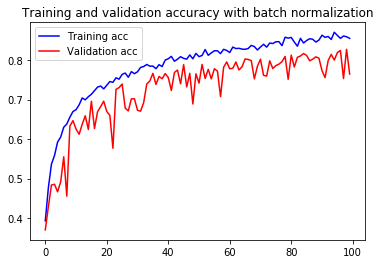

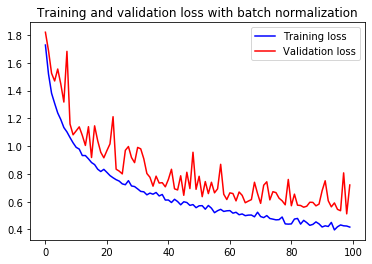

In [10]:
plot_history(history, "with batch normalization")

In [11]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 105us/step
Test loss: 0.7201218551635742
Test accuracy: 0.7644


# Without Batch Normalization

In [12]:
save_dir = os.path.join(os.getcwd(), './Example_Batch_Normalization/without_batch_normalization/')
model_name = 'keras_cifar10_trained_model_without_bh.h5'

In [13]:
model = model_without_batch_normalization()
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)


# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
# Fit the model on the batches generated by datagen.flow().
history_without_bh = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs,steps_per_epoch=50, validation_data=(x_test, y_test), workers=4)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/100
50/50 [==============================] - 4s 88ms/step - loss: 2.2836 - acc: 0.1305 - val_loss: 2.2149 - val_acc: 0.2425
Epoch 2/100
50/50 [==============================] - 4s 73ms/step - loss: 2.1229 - acc: 0.2134 - val_loss: 2.0307 - val_acc: 0.2543
Epoch 3/100
50/50 [==============================] - 4s 76ms/step - loss: 2.0245 - acc: 0.2467 - val_loss: 1.9508 - val_acc: 0.3049
Epoch 4/100
50/50 [==============================] - 4s 74ms/step - loss: 1.9654 - acc: 0.2766 - val_loss: 1.9306 - val_acc: 0.3182
Epoch 5/100
50/50 [==============================] - 4s 74ms/step - loss: 1.9158 - acc: 0.3109 - val_loss: 1.8257 - val_acc: 0.3545
Epoch 6/100
50/50 [==============================] - 4s 75ms/step - loss: 1.8948 - acc: 0.3098 - val_loss: 1.8017 - val_acc: 0.3617
Epoch 7/100
50/50 [==============================] - 4s 74ms/step - loss: 1.8586 - acc: 0.321

In [14]:
with open('./Example_Batch_Normalization/trainHistory_without_bh', 'wb') as file_pi:
            pickle.dump(history_without_bh.history, file_pi)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/longxiajun/Documents/Python/OpenCV/OpenCV_for_Beginners/Deep_Learning_for_OpenCV/./Example_Batch_Normalization/without_batch_normalization/keras_cifar10_trained_model_without_bh.h5 


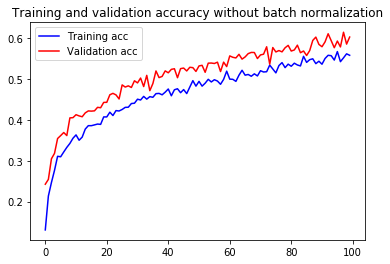

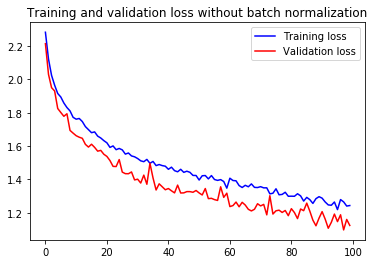

In [15]:
plot_history(history_without_bh, "without batch normalization")

In [16]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 82us/step
Test loss: 1.1231803590774536
Test accuracy: 0.6033
